# Курсовая работа #

## Часть 1. Метод неопределенных коэффициэнтов

Импортирую данные из exel, используя библиотеку pandas.Затем выведу массив.

In [10]:
import pandas as pd
data = pd.read_excel('https://github.com/MiclkeNew/some_works/blob/main/210_1.xlsx',engine='openpyxl', sheet_name = 'Новиков')
x = data.iloc[:,0].tolist()
y = data.iloc[:,1].tolist()
print('x: ',x)
print('y: ',y)

x:  [0, 9, 10, 20, 21, 30, 41, 50, 60, 75, 79, 100, 118, 125, 150, 158, 200, 234, 250, 300, 310, 400, 491, 500, 600, 700, 766]
y:  [13.7, 13.67, 13.67, 13.67, 13.67, 13.6, 13.51, 13.48, 13.47, 13.43, 13.42, 13.5, 13.56, 13.27, 12.03, 11.56, 9.83, 8.79, 8.53, 8.0, 7.95, 6.99, 6.13, 6.08, 5.52, 4.95, 4.58]


Найду интеполяционную функцию вида y = ax + b

In [3]:
import numpy as np
def MNK(x, y):
    a1 = np.sum(np.multiply(x, x))
    a2 = np.sum(x)
    a3 = np.sum(np.multiply(x, y))
    b1 = a2
    b2 = len(x)
    b3 = np.sum(y)
    A = np.array([[a1, a2], [b1, b2]])
    B = np.array([[a3],[b3]])
    Sol = np.linalg.solve(A, B)
    Sol0 = Sol[0,0]
    Sol1 = Sol[1,0]
    return (Sol0, Sol1)
a, b = MNK(x, y)
print(a,b)

-0.014409115850865096 13.85517202175796


Строим график полученной функции и отмечаем иходные точки

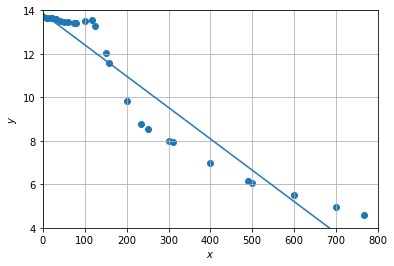

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([0, 800])
ax.set_ylim([4, 14])
c = np.arange(0, 766)
plt.scatter(x, y)
plt.plot(a*c+b)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Часть 2. Интерполяционный многочлен Лагранжа

Импортирую данные из exel

In [5]:
import pandas as pd
df = pd.read_excel('https://github.com/MiclkeNew/some_works/blob/main/210_1.xlsx',engine='openpyxl', sheet_name = 'Lagrange')
df = df.dropna()
x = df.iloc[:,0].tolist()
y = df.iloc[:,1].tolist()
print('x: ', x)
print('y: ', y)

x:  [233.0, 232.5, 232.8, 234.1, 234.0, 233.0, 231.0, 228.5, 220.1, 218.6, 211.2, 204.5, 198.2, 178.3, 176.7, 173.6, 166.8, 158.9, 155.7, 139.6, 135.4, 122.4, 114.0, 113.9, 107.8, 101.5, 95.4]
y:  [0, 8, 10, 19, 20, 39, 50, 58, 75, 78, 101, 118, 126, 151, 153, 201, 252, 287, 302, 376, 403, 504, 603, 605, 706, 807, 904]


Строю многочлен Лагранжа

In [6]:
def create_basic_polynomial(x, i):
    def basic_polynomial(X):
        divider = 1
        result = 1
        for j in range(len(x)):
            if j != i:
                result *= (X-x[j])
                divider *= (x[i]-x[j])
            if divider == 0:
                divider = 1
        return result/divider
    return basic_polynomial

def create_Lagrange_polynomial(x, y):
    basic_polynomials = []
    for i in range(len(x)):
        basic_polynomials.append(create_basic_polynomial(x, i))

    def lagrange_polynomial(X):
        result = 0
        for i in range(len(y)):
            result += y[i]*basic_polynomials[i](X)
        return result
    return lagrange_polynomial
lag_pol = create_Lagrange_polynomial(x, y)

С помощью библиотеки matplotlib изобразим.

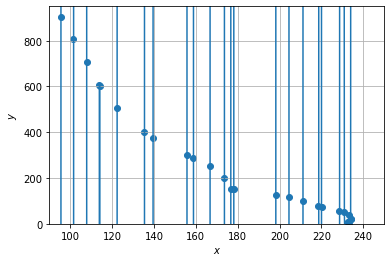

In [7]:


import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim([90, 250])
ax.set_ylim([0, 950])
plt.scatter(x, y) 
c = np.arange(0, 260, 1)
plt.plot(lag_pol(c))
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Вывод

С помощью различных библиотек python можно решать различные задачи. В этой работе я задействовал библиотеки matplotlib.pyplot, pandas и numpy, для построения функций